## Before proceeding with the notebook please select cell ,then run all to load the plots into view. 

## The 2019-nCoV is a contagious coronavirus that hailed from Wuhan, China. This new strain of virus has striked fear in many countries as cities are quarantined and hospitals are overcrowded. This dataset will help us understand how 2019-nCoV is spread aroud the world.

## The Data set we will be using for this analysis at is from Kaggle
https://www.kaggle.com/imdevskp/corona-virus-report

### We will import the necessary libraries below

In [24]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import plot,iplot,download_plotlyjs, init_notebook_mode
import cufflinks as cf
import plotly.graph_objs as go

In [72]:
data = pd.read_csv("resources/covid_19.csv", index_col = "Date", parse_dates = True)

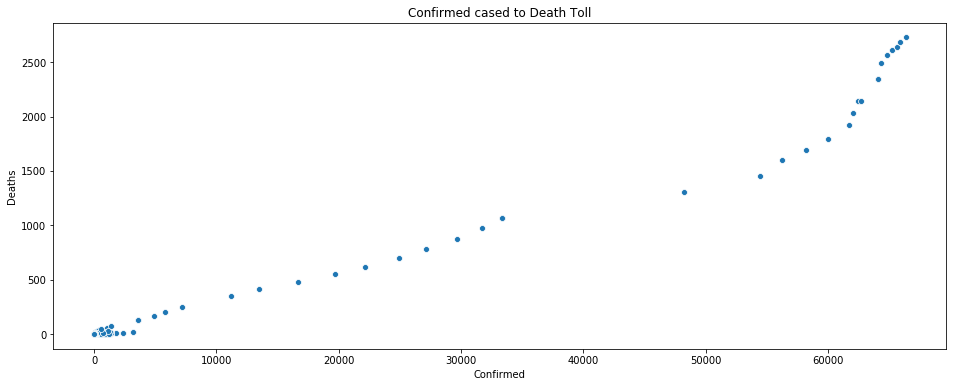

In [118]:
plt.figure(figsize=(16,6))
plt.title("Confirmed cased to Death Toll")
sns.scatterplot(x = "Confirmed" , y = "Deaths", data=data);

## We can see above that the death tole seems to grow exponentially as the confirmed cases increase. 

In [20]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


## Lets take a look at MainLand China since there largest amounts of cases is there

Text(0.5, 1.0, 'Confirmed cases vs Revovery in Midland China-TO Date')

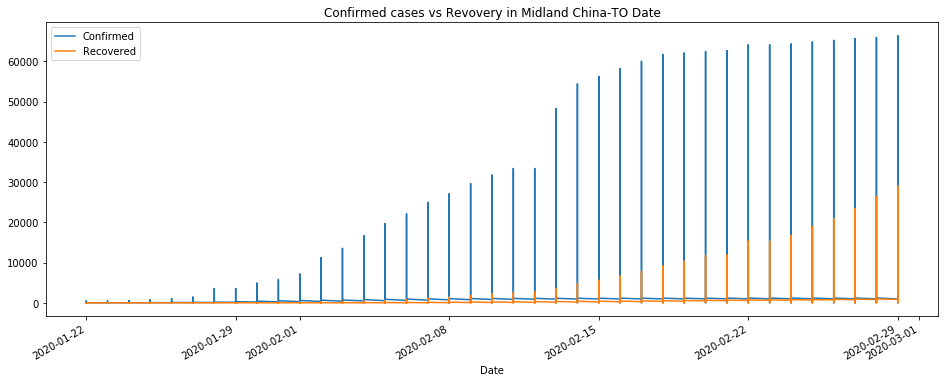

In [96]:
data[data["Country/Region"] == "Mainland China"][["Confirmed","Recovered"]].plot(figsize = (16,6))
plt.title("Confirmed cases vs Revovery in Midland China-TO Date")

### Below we will look at all of the cases of corona since the virus was first discovered. This will be total before the revovery of any patient. The map will show the growth of the virus up to current date. 

In [41]:
by_country = data.groupby("Country/Region").sum().sort_values("Confirmed", ascending = False)

In [43]:
by_country.head()

,Lat,Long,Confirmed,Deaths,Recovered
Country/Region,,,,,
Mainland China,40388.98578,134855.370,1669432,47269,377585
South Korea,1404.00000,4992.000,12164,83,283
Others,1382.30430,5445.882,10076,35,44
Italy,1677.00000,468.000,3968,102,145
Japan,1404.00000,5382.000,2412,28,348


In [66]:
mapData = dict(type = "choropleth", locations = by_country.index, locationmode = "country names",
              colorscale = "fall", text = by_country.index, z = by_country["Confirmed"], colorbar = {"title": "Confirmed Cases"})

In [67]:
by_country_layout = dict(title = "Confirmed Cases of Conrona since beginning", geo = dict(showframe = False, projection = {"type":"natural earth"}))

In [68]:
fig = go.Figure(data=mapData, layout=by_country_layout)
fig

### Lets take a look at the Death toll for each country 

In [125]:
by_Death = data.groupby("Country/Region").sum().sort_values("Deaths", ascending = False)
by_Death.head(2)

,Lat,Long,Confirmed,Deaths,Recovered
Country/Region,,,,,
Mainland China,40388.98578,134855.37,1669432,47269,377585
Iran,1248.00000,2067.00,1617,171,294


In [126]:
by_d_map = dict(type = "choropleth", locations = by_Death.index, locationmode = "country names",
               colorscale = "fall", text = by_Death.index, z = by_Death["Deaths"], colorbar = {"title": "Death Toll"})

In [127]:
by_d_layout = dict(title = "Death Toll by Country", geo = dict(showframe = False, projection = {"type":"natural earth"}))

In [128]:
go.Figure(data=by_d_map, layout = by_d_layout)

## We will take a look at the recovery of confirmed cases

In [117]:
by_recovery = data.groupby("Country/Region").sum().sort_values("Recovered",ascending = False)
by_recovery.head(20)

,Lat,Long,Confirmed,Deaths,Recovered
Country/Region,,,,,
Mainland China,40388.98578,134855.3700,1669432,47269,377585
Singapore,50.04870,4049.4987,1848,0,706
Thailand,585.00000,3939.0000,1026,0,417
Japan,1404.00000,5382.0000,2412,28,348
Iran,1248.00000,2067.0000,1617,171,294
South Korea,1404.00000,4992.0000,12164,83,283
Malaysia,97.50000,4387.5000,567,0,233
Vietnam,624.00000,4212.0000,416,0,214
Australia,-5114.24160,32903.1924,524,0,199


In [109]:
reco_map_data = dict(type = "choropleth", locations = by_recovery.index, locationmode = "country names",
                    colorscale = "jet", text = by_recovery.index, z = by_recovery["Recovered"], colorbar = {"title": "Cases Recovered"} )

In [112]:
reco_layout = dict(title = "Recovered cases by county to Date", geo = dict(showframe = False, projection = {"type": "natural earth"}))

In [113]:
go.Figure(data=reco_map_data, layout=reco_layout)